In [14]:
import pandas as pd
import pandas as pd #veri okuma ve analiz etme paketi
import seaborn as sns
import matplotlib.pyplot as plt #graafik çizme - charts
%matplotlib inline 
import numpy as np #sahte veri üretmemizi sağlar,MATEMATİK,VECTÖRLER,TÜREV,İNTREGRAL,DİFERANSİYEL DENKLEMLER,İSTATİSTİK
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Uber Request Data.csv')

In [3]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
df.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN
6744,6753,Airport,NaN,No Cars Available,15-07-2016 23:55:03,NaN


In [5]:
df.sample(4)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
5508,3845,Airport,NaN,No Cars Available,13-07-2016 21:30:19,NaN
2062,1065,Airport,218.0,Trip Completed,11/7/2016 19:51,11/7/2016 20:43
1182,2962,City,123.0,Trip Completed,13-07-2016 06:47:53,13-07-2016 07:58:34
4217,460,City,NaN,No Cars Available,11/7/2016 9:21,NaN


In [27]:
df.groupby(['Status']).count()

,Request id,Pickup point,Driver id,r_date,d_date,r_hour,dayofweek,timeofday
Status,,,,,,,,
Cancelled,1264,1264,1264,1264,0,1264,1264,1264
No Cars Available,2650,2650,0,2650,0,2650,2650,2650
Trip Completed,2831,2831,2831,2831,2831,2831,2831,2830


In [6]:
df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [8]:
df.shape

(6745, 6)

In [10]:
df.corr()

,Request id,Driver id
Request id,1.000000,-0.011499
Driver id,-0.011499,1.000000


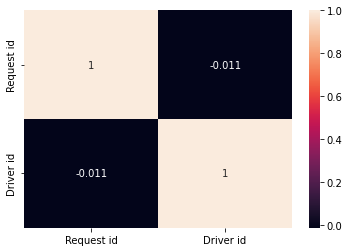

In [13]:
sns.heatmap(df.corr(),annot=True);#annot=True = grafiğin içindeki korelasyon kutucuklarına korelasyon değerlerini yazdırır
#korelasyon %100 çıkarsa veri farklı şekilde kendini tekrar etmiş olur.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


##Feature Engineering

In [15]:
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [17]:
df.sample()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6425,6177,City,NaN,No Cars Available,2016-07-15 17:00:26,NaT


In [18]:
#zaman damgalarından türetilen daha iyi anlamak için biraz daha sütun ekleyelim
df['r_date'] = df['Request timestamp'].dt.date
df['r_time'] = df['Request timestamp'].dt.time
df['d_date'] = df['Drop timestamp'].dt.date
df['d_time'] = df['Drop timestamp'].dt.time
df['r_hour'] = df['Request timestamp'].dt.hour.astype(int)
day_of_week = {0:'Mon',1:'Tue',2:'Wed',3:'Thr',4:'Fri',5:'Sat',6:'Sun'}
# bölmeleri ve etiketleri tanımlayın
bins = ['00:00:00', '03:00:00', '11:00:00','15:00:00', '17:00:00', '23:59:59']
labels = ['Late Night', 'Early Morning', 'Mid-Day','Evening', 'Late Evening']
df['dayofweek'] = df['Request timestamp'].dt.dayofweek.map(day_of_week)
df['timeofday'] = pd.cut(pd.to_timedelta(df['Request timestamp'].dt.time.astype(str)), bins=pd.to_timedelta(bins), labels=labels, ordered=False)

In [19]:
#analiz için gerekli olmayan sütunları bırakın
df.drop(['Request timestamp','Drop timestamp','d_time','r_time'],axis=1,inplace=True)

In [20]:
df.sample(3)

,Request id,Pickup point,Driver id,Status,r_date,d_date,r_hour,dayofweek,timeofday
5984,5082,Airport,NaN,No Cars Available,2016-07-14,NaT,19,Thr,Late Evening
6558,6408,Airport,NaN,No Cars Available,2016-07-15,NaT,19,Fri,Late Evening
117,1696,Airport,13.0,Trip Completed,2016-12-07,2016-12-07,8,Wed,Early Morning


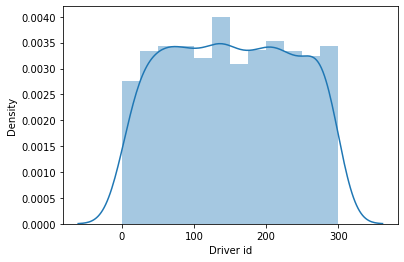

In [28]:
sns.distplot(df[df['Status']!='Trip Completed']['Driver id'])

In [22]:
df_new = df[df['Status']!='Trip Completed']
len(df_new)

3914

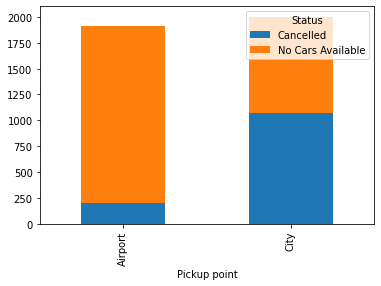

In [23]:
#toplama noktalarına göre
df_temp = df_new.groupby(['Status','Pickup point']).agg({'r_date':'count'}).reset_index(level=1)
pd.pivot_table(df_temp, values ='Pickup point',index=['Pickup point'],columns =['Status']).plot(kind='bar',stacked=True)
plt.show()

gözlemler:

Yolculuklar Şehirden Havaalanına yapıldığında daha çok iptal edilen yolculuk var
Yolculuklar Havaalanından Şehire yapıldığında daha fazla taksi bulunamadı

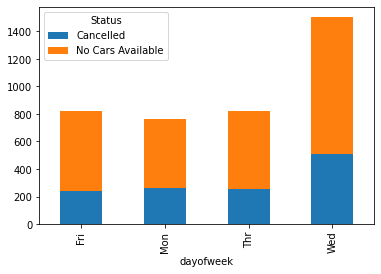

In [25]:
#haftanın günlerine göre
df_temp = df_new.groupby(['Status','dayofweek']).agg({'r_date':'count'}).reset_index(level=1)
pd.pivot_table(df_temp, values ='dayofweek',index=['dayofweek'],columns =['Status']).plot(kind='bar',stacked=True)
plt.show()

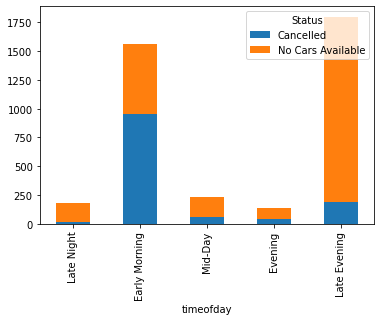

In [26]:
#günün saatine göre
df_temp = df_new.groupby(['Status','timeofday']).agg({'r_date':'count'}).reset_index(level=1)
pd.pivot_table(df_temp, values ='timeofday',index=['timeofday'],columns =['Status']).plot(kind='bar',stacked=True)
plt.show()

Text(0.5, 1.0, 'aylık işlem')

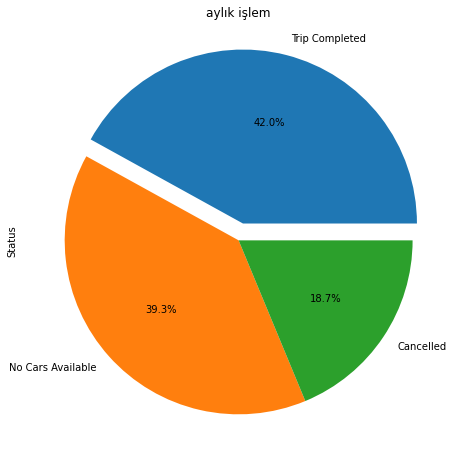

In [29]:
plt.figure(figsize=(8,8))
explode=[0.1,0,0] #en büyük dilimi ayırmak için
df['Status'].value_counts().plot.pie(autopct='%1.1f%%',explode=explode) #aylara göre satışı pasta grafiğinde gösterir
#yüzdeleri dilimlerin içine yazdırmak için(autopct='%1.1f%%')
plt.title('aylık işlem')

Text(0.5, 1.0, 'aylık işlem')

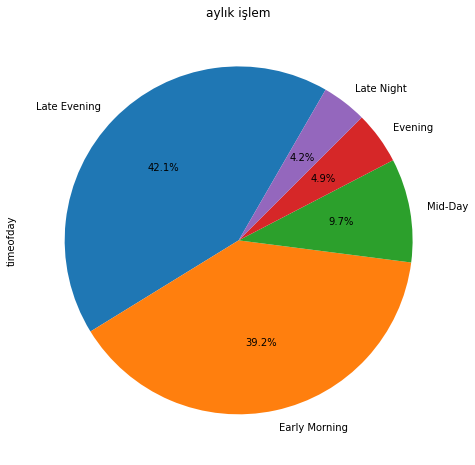

In [30]:
plt.figure(figsize=(8,8))
explode=(0.1,0.05,0.05)
df['timeofday'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60)
plt.title('aylık işlem')

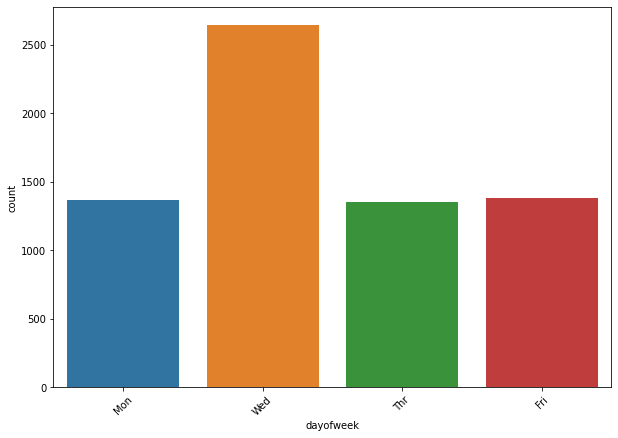

In [32]:
plt.figure(figsize=(10,7))
sns.countplot(df['dayofweek']);#hangi ürünler en çok satılmış
plt.xticks(rotation=45);

Text(0.5, 1.0, 'aylık işlem')

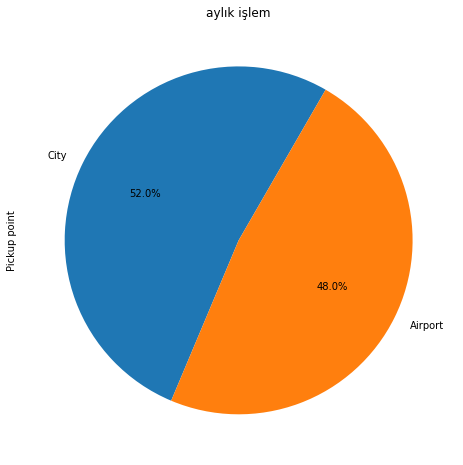

In [33]:
plt.figure(figsize=(8,8))
explode=(0.1,0.05,0.05)
df['Pickup point'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60)
plt.title('aylık işlem')

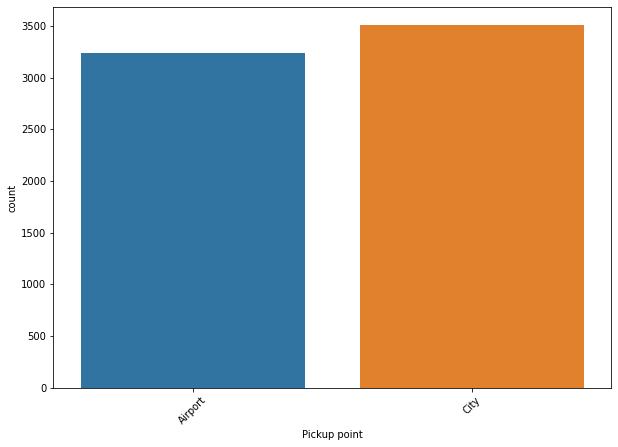

In [34]:
plt.figure(figsize=(10,7))
sns.countplot(df['Pickup point']);#hangi ürünler en çok satılmış
plt.xticks(rotation=45);

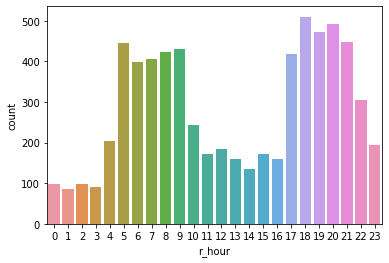

In [35]:
sns.countplot(df['r_hour']) #hangi saatte en fazla yolculuk yapılmış onu gösterir.

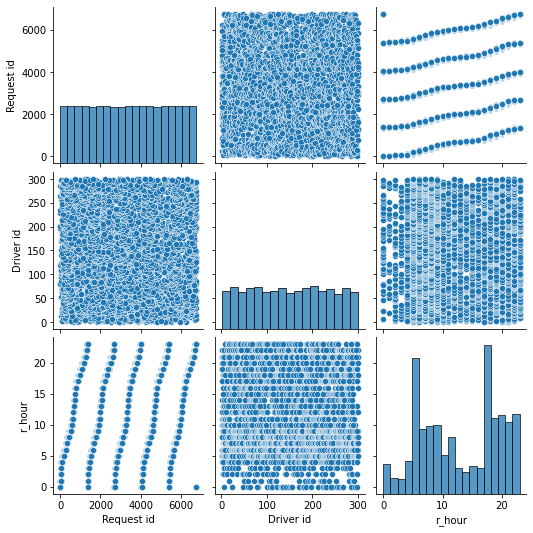

In [36]:
sns.pairplot(df)

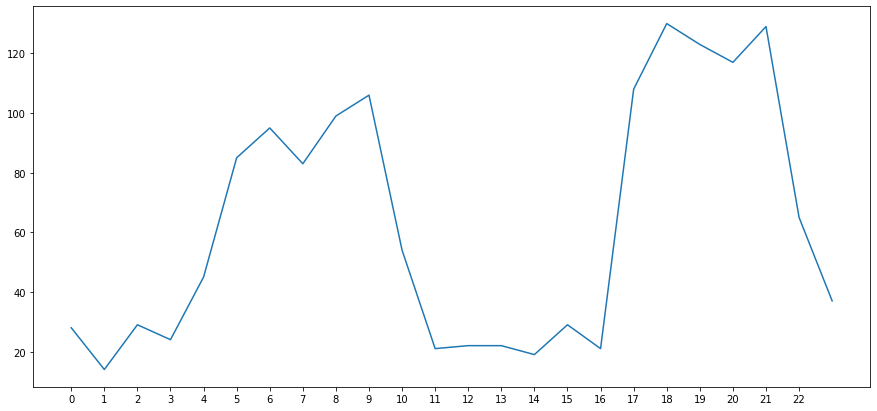

In [37]:
plt.figure(figsize=(15,7)) 
plt.xticks(np.arange(0, 23, 1.0))
keys = list(range(0,24))
df_new[df_new['dayofweek']=='Wed']['r_hour'].value_counts().sort_index().plot()
plt.show()